In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

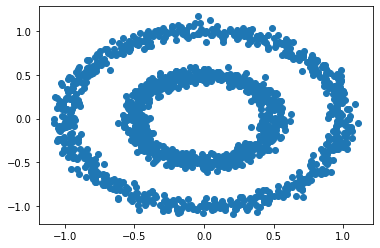

In [2]:
data = pd.read_csv("circles.csv")
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

## k-means Algorithm

In [3]:
from sklearn.cluster import KMeans

In [4]:
# choose value of k (number of clusters)
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data)
    ideal_k.append([i,est_kmeans.inertia_])

In [5]:
ideal_k = np.array(ideal_k)

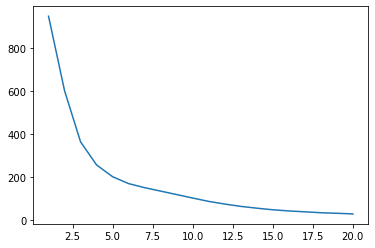

In [6]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

In [7]:
# breaking point of the plot is around 5 => k=5
est_kmeans = KMeans(n_clusters=5, random_state=0)
est_kmeans.fit(data)
pred_kmeans = est_kmeans.predict(data)

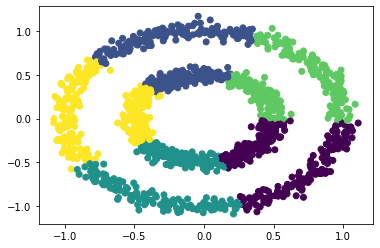

In [8]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_kmeans)
plt.show()

## Mean-Shift Algorithm

In [18]:
from sklearn.cluster import MeanShift

In [21]:
est_meanshift = MeanShift(bandwidth=0.5)
est_meanshift.fit(data)
pred_meanshift = est_meanshift.predict(data)

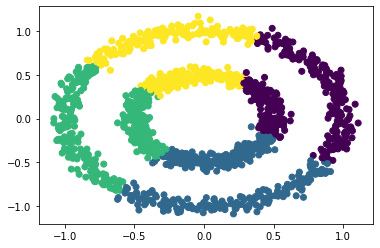

In [22]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_meanshift)
plt.show()

## DBSCAN Algorithm

In [24]:
from sklearn.cluster import DBSCAN

In [26]:
est_dbscan = DBSCAN(eps=0.1)
pred_dbscan = est_dbscan.fit_predict(data)  # DBSCAN algorithm in scikit-learn does not contain a predict() method alone

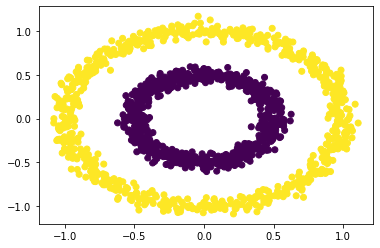

In [27]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_dbscan)
plt.show()

## Evaluating the Performance of Clusters
### Evaluating the Silhouette Coefficient Score

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [33]:
kmeans_score = silhouette_score(data, pred_kmeans, metric='euclidean')
meanshift_score = silhouette_score(data, pred_meanshift, metric='euclidean')
dbscan_score = silhouette_score(data, pred_dbscan, metric='euclidean')

print('kmeans_score =', kmeans_score, '\nmeanshift_score =', meanshift_score, '\ndbscan_score =', dbscan_score)

kmeans_score = 0.359407374205259 
meanshift_score = 0.3705351315933256 
dbscan_score = 0.11394082711912518


In [34]:
## Note: this type of score does not perform well when evaluating the DBSCAN algorithm

### Evaluating the Calinski–Harabasz Index

In [36]:
kmeans_score = calinski_harabasz_score(data, pred_kmeans)
meanshift_score = calinski_harabasz_score(data, pred_meanshift)
dbscan_score = calinski_harabasz_score(data, pred_dbscan)

print('kmeans_score =', kmeans_score, '\nmeanshift_score =', meanshift_score, '\ndbscan_score =', dbscan_score)

kmeans_score = 1379.6720998204187 
meanshift_score = 1305.1425653034062 
dbscan_score = 0.0017164732936172662
